In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv(r'C:\Users\MOMomomomomomomomomo\Desktop\proj_data\data_s2\heart.csv')

40  M  ATA  140  289  0  Normal  172  N  0.1    Up  0.2
0  49  F  NAP  160  180  0  Normal  156  N  1.0  Flat    1
1  37  M  ATA  130  283  0      ST   98  N  0.0    Up    0
2  48  F  ASY  138  214  0  Normal  108  Y  1.5  Flat    1
3  54  M  NAP  150  195  0  Normal  122  N  0.0    Up    0
4  39  M  NAP  120  339  0  Normal  170  N  0.0    Up    0

In [6]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Explore Data


In [7]:
data.shape

(918, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [13]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

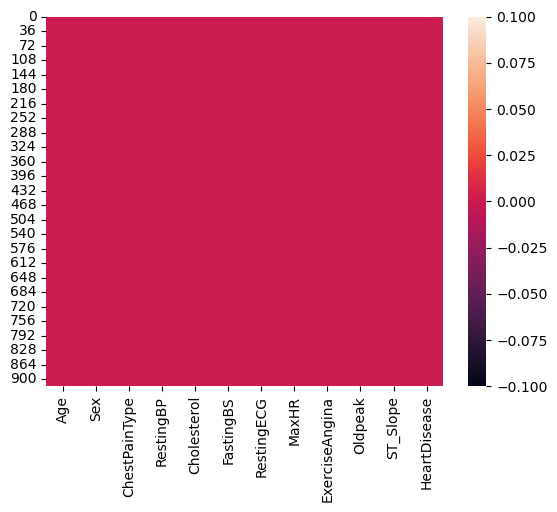

In [14]:
sns.heatmap(data.isnull()) 

In [16]:
data.duplicated().sum()

0

# Analysis

In [18]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

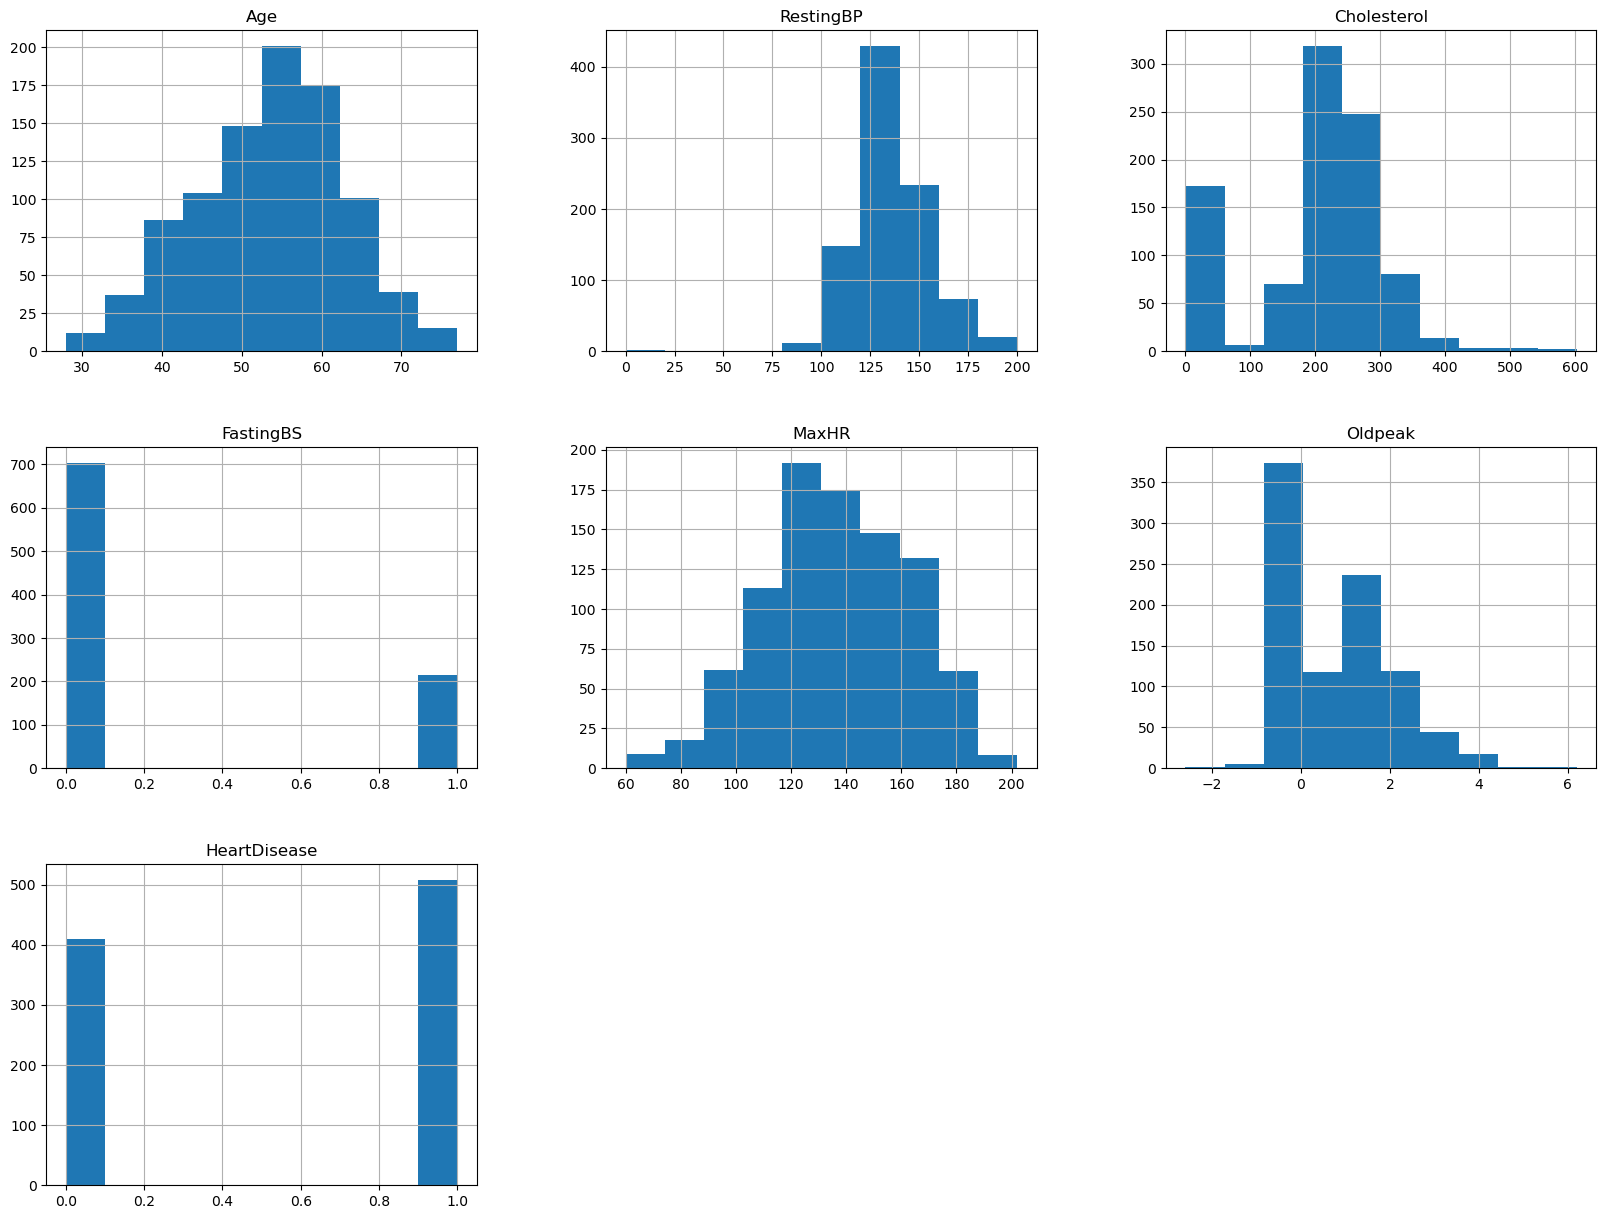

In [20]:
data.hist(figsize=(20,15))
plt.show()

In [21]:
cor = data.corr() # to know what the relationship between columns

<AxesSubplot:>

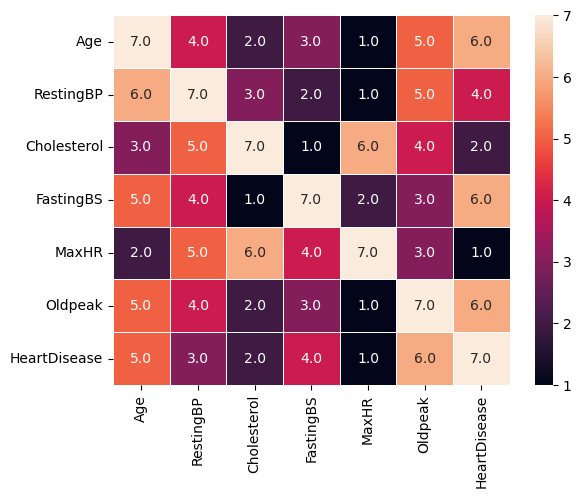

In [25]:
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidth=.5)

# Processing Data

In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder() # to convert data type for columns element

In [27]:
obj=data.select_dtypes(include='object') # this are data is object(string)
no_obj=data.select_dtypes(exclude='object')

In [32]:
for i in range(0,obj.shape[1]): # to convert all objects to numeric
    obj.iloc[:,i]=label.fit_transform(obj.iloc[:,i])

In [34]:
df = pd.concat([obj,no_obj],axis=1)# to concate as columns

In [35]:
df

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope  Age  RestingBP  \
0      1              1           1               0         2   40        140   
1      0              2           1               0         1   49        160   
2      1              1           2               0         2   37        130   
3      0              0           1               1         1   48        138   
4      1              2           1               0         2   54        150   
..   ...            ...         ...             ...       ...  ...        ...   
913    1              3           1               0         1   45        110   
914    1              0           1               0         1   68        144   
915    1              0           1               1         1   57        130   
916    0              1           0               0         1   57        130   
917    1              2           1               0         2   38        138   

     Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  
0            289          0    172      0.0             0  
1            180          0    156      1.0             1  
2            283          0     98      0.0             0  
3            214          0    108      1.5             1  
4            195          0    122      0.0             0  
..           ...        ...    ...      ...           ...  
913          264          0    132      1.2             1  
914          193          1    141      3.4             1  
915          131          0    115      1.2             1  
916          236          0    174      0.0             1  
917          175          0    173      0.0             0  

[918 rows x 12 columns]

# Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score ,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [39]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.8)

In [50]:
def call(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(confusion_matrix(pre,y_test))
    print(classification_report(pre,y_test))

In [51]:
model_1=KNeighborsClassifier()
call(model_1)

[[61 30]
 [21 72]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.71        91
           1       0.71      0.77      0.74        93

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



C:\Users\MOMomomomomomomomomo\Downloads\pypy\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
model_2=DecisionTreeClassifier()
call(model_2)

[[66 24]
 [16 78]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        90
           1       0.76      0.83      0.80        94

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [54]:
model_3 = SVC()
call(model_3)

[[67 34]
 [15 68]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       101
           1       0.67      0.82      0.74        83

    accuracy                           0.73       184
   macro avg       0.74      0.74      0.73       184
weighted avg       0.75      0.73      0.73       184



In [55]:
model_4 = GaussianNB()
call(model_4)

[[75 14]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        89
           1       0.86      0.93      0.89        95

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



In [56]:
model_5 = RandomForestClassifier()
call(model_5)

[[74  8]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        82
           1       0.92      0.92      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [57]:
model_6 = GradientBoostingClassifier()
call(model_6)

[[73  9]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.91      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

